To apply unsupervised clustering algorithms such as K-Means and DBSCAN on real-world sensor data (e.g., motion or activity logs) to detect patterns or group similar user behaviors without labeled outcomes. The goal is to simulate real-world AR/VR scenarios where systems must intelligently interpret raw input from devices.

In [9]:
from sklearn.datasets import load_iris
import pandas as pd

# Load iris dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target  # actual species labels

X.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


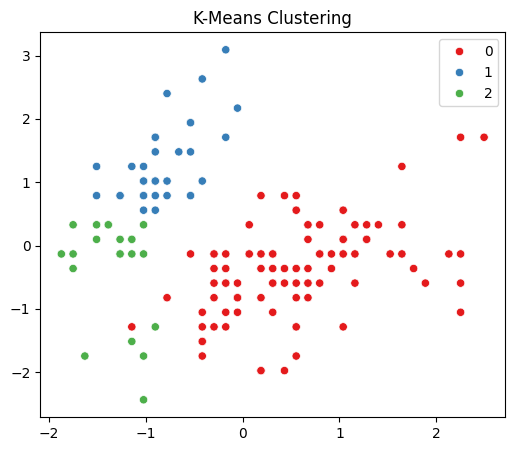

In [11]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Visualize clusters using first two features
plt.figure(figsize=(6, 5))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=kmeans_labels, palette='Set1')
plt.title("K-Means Clustering")
plt.show()


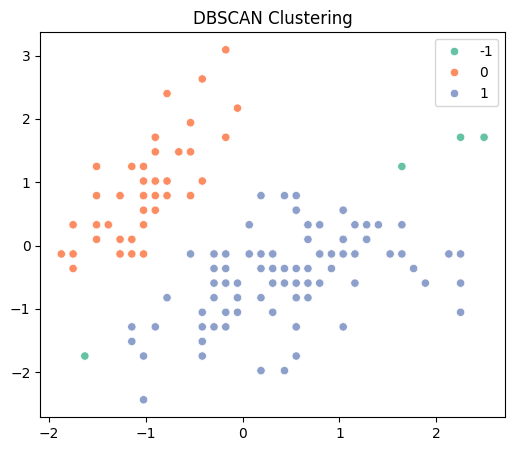

In [12]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.8, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

plt.figure(figsize=(6, 5))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=dbscan_labels, palette='Set2')
plt.title("DBSCAN Clustering")
plt.show()


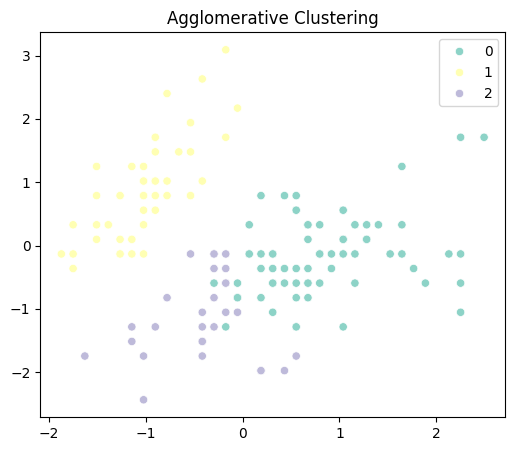

In [13]:
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters=3)
agg_labels = agg.fit_predict(X_scaled)

plt.figure(figsize=(6, 5))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=agg_labels, palette='Set3')
plt.title("Agglomerative Clustering")
plt.show()


In [14]:
from sklearn.metrics import silhouette_score, adjusted_rand_score

print("KMeans Silhouette Score:", silhouette_score(X_scaled, kmeans_labels))
print("DBSCAN Silhouette Score:", silhouette_score(X_scaled, dbscan_labels))
print("Agglomerative Silhouette Score:", silhouette_score(X_scaled, agg_labels))

# Compare with actual labels
print("KMeans ARI:", adjusted_rand_score(y, kmeans_labels))
print("DBSCAN ARI:", adjusted_rand_score(y, dbscan_labels))
print("Agglomerative ARI:", adjusted_rand_score(y, agg_labels))


KMeans Silhouette Score: 0.4798814508199817
DBSCAN Silhouette Score: 0.5216965052515835
Agglomerative Silhouette Score: 0.4466890410285909
KMeans ARI: 0.432804702527474
DBSCAN ARI: 0.5517553852833211
Agglomerative ARI: 0.6153229932145449


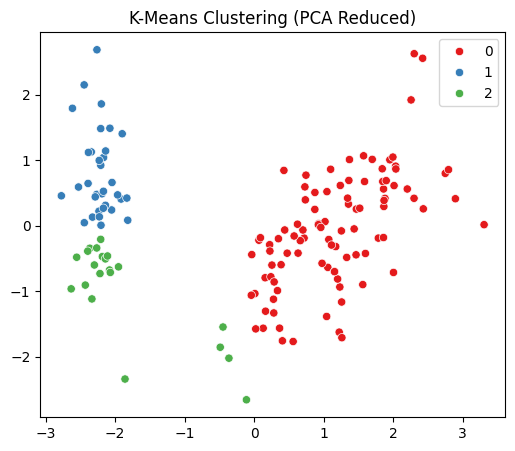

In [15]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(6, 5))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=kmeans_labels, palette='Set1')
plt.title("K-Means Clustering (PCA Reduced)")
plt.show()
